# Whitened signal in gaussian noise background

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# set seed
np.random.seed(16192802)

## Building noise background

In [14]:
# time
time_step = 1/(10000)
t = np.arange(-4, 0, 2*time_step)

# gaussian noise (with std dev 1)
gaussian_noise = np.random.randn(t.size)

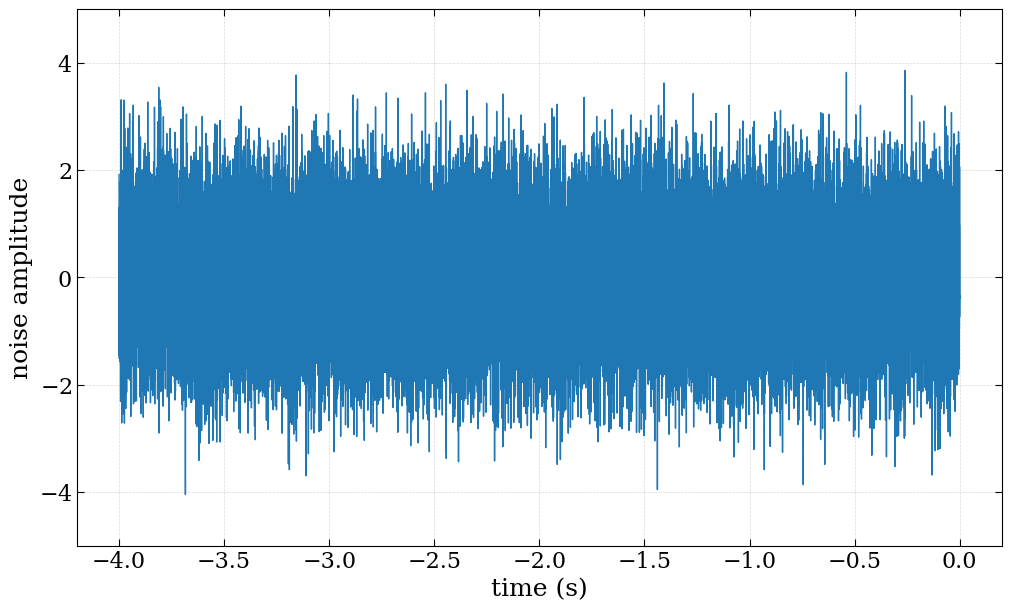

In [4]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, gaussian_noise, color='tab:blue', linewidth=1)

# labels
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('noise amplitude', fontdict={'fontfamily':'serif', 'fontsize':18})
# ax.set_title('noise amplitude', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(11)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# axis limits
ax.set_ylim(-5, 5)

plt.show()

## Noise PSD

In [5]:
import scipy.fft as fft
import scipy.signal as signal

In [6]:
# calculate PSD
psd_f, psd = signal.periodogram(gaussian_noise, fs=1/time_step, window='boxcar', nfft=None, detrend=False, return_onesided=True, scaling='density')

asd = np.sqrt(psd)

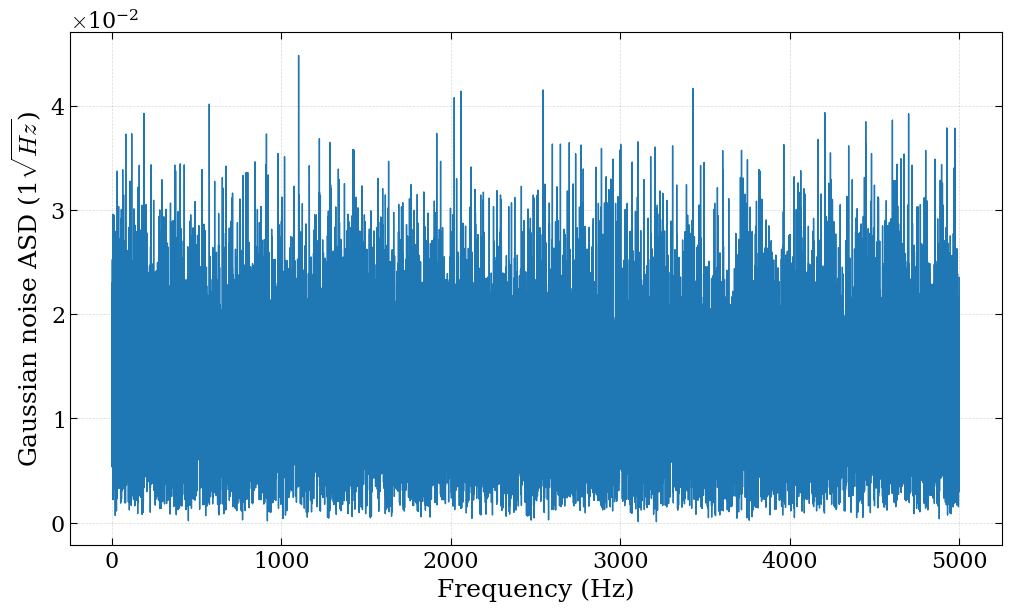

In [7]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(psd_f, asd, color='tab:blue', linewidth=1, label='Signal PSD')
# ax.set_xscale('log')

# labels
ax.set_xlabel('Frequency (Hz)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('Gaussian noise ASD (1$\sqrt{Hz}$)', fontdict={'fontfamily':'serif', 'fontsize':18})
# ax.set_title('Signal PSD', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# exp(10)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(16)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# ax.set_ylim(-0.1*10**(-3), 1.9*10**(-3))

# legend
# ax.legend(prop={'size' : 14}, loc='best')

plt.show()

## Adding withened signal to background

In [9]:
# import whitened signal
whitened_signal = np.loadtxt('whitened_signal.txt')

In [12]:
norm = 1 / np.max(np.abs(whitened_signal))
# scaled amplitude
norm_sig = norm * whitened_signal
noisy_signal = norm_sig + gaussian_noise

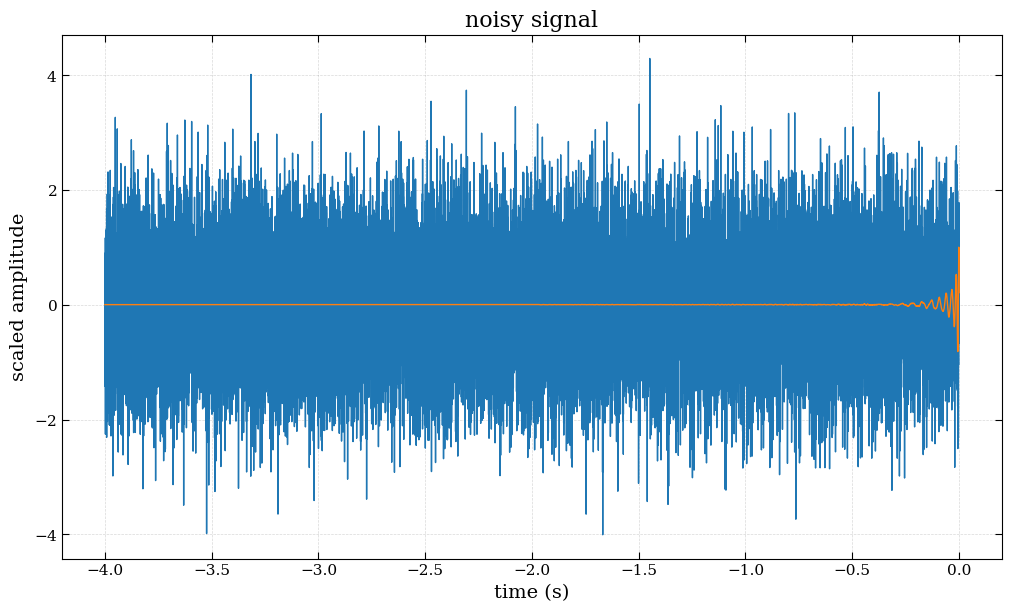

In [15]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True) 

# plot
ax.plot(t, noisy_signal, color='tab:blue', linewidth=1)
ax.plot(t, norm_sig, color='tab:orange', linewidth=1)

# labels
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_ylabel('scaled amplitude', fontdict={'fontfamily':'serif', 'fontsize':14})
ax.set_title('noisy signal', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=11)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.get_offset_text().set_fontsize(11)
ax.ticklabel_format(axis="y", style="scientific", scilimits=(0,0))

# axis limits
# ax.set_xlim(-0.1, 0.025)
# ax.set_ylim(-5*10**(-23), 5*10**(-23))

plt.show()

## Match function

In [16]:
# computing match for one signal and one noise background

n1 = np.linalg.norm(norm_sig)
n2 = np.linalg.norm(noisy_signal)

match = np.dot(norm_sig, noisy_signal) / (n1*n2)

print(f"Match: {match:.3f}")

Match: 0.025


## Match over SNR

We will create an array of Gaussian noise backgrounds, then for a signal with fixed SNR (in this case the signal with GW150914 parameters), we will compute the match between the signal and every noise background from the array. Then we will extimate the mean match with the corrispondent error.

In [19]:
# Create a numpy array of 100 random arrays each one of t.size size
N = 100

bkgs = np.random.rand(N, t.size)

# injecting signal in bkgs
signals = np.add(bkgs, norm_sig)

# array with each array norm
n = np.linalg.norm(signals, axis=1)

# scalar product between every array and the whitened chirp
scalar_products = np.dot(signals, norm_sig)

matches = scalar_products/ (n1 * n)

match_mean = sum(matches) / N

err_mean = np.std(matches) / N

print(f"Match mean: {match_mean:.2e}")
print(f"Match mean error: {err_mean:.2e}")

Match mean: 7.13e-02
Match mean error: 3.18e-05


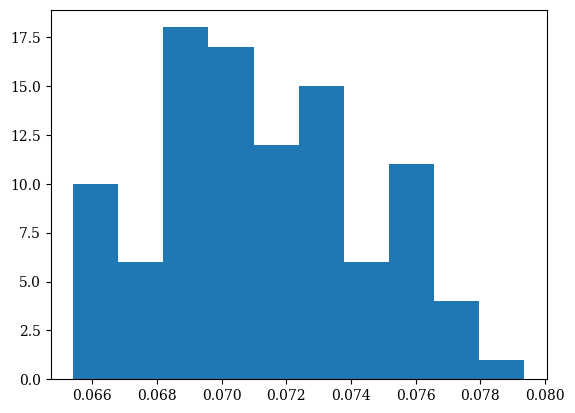

In [20]:
# just to visualize matches distribution
plt.hist(matches)
plt.show()